## Has Covid Deaths Affected the World Hapiness?

##### Contributors: Parker Teske, Carie Bates, Francisco Martinez, Victoria O’Byrne, Katharyn Hogle, Corey Monsma

Outline: Using data from the world happiness reports from  2015 to 2022  we will determine which Countries offer the highest happiness score, we will focus on the top 20 countries to determine how much the happiness score is affected by GDP and life expectancy .  Using regression analysis we will determine if the scores are positively or negatively by COVID mortality rates in 2020-2022. This analysis can be used by the healthcare industry.

Data source: Happiness scores are from the World Happiness report 
World Happiness Report up to 2022 | Kaggle - happiness data, the happiness score is determined by six factors; levels of GDP, life expectancy, generosity, social support, freedom, and corruption)
COVID mortality rates are from https://covid19.who.int/WHO-COVID-19-global-data.csv
Johns Hopkins University - https://github.com/CSSEGISandData/COVID-19


Null Hypothesis:
Happiness scores were not impacted by by covid deaths in the years 2020 through 2022.
Alternative Hypothesis:
Happiness scores were negatively impacted by covid deaths in the years 2020 through 2022 with a confidence level of 95% or p value < .05.


csv files are imported 
pandas dataframes are created
Data is merged for happiness and covid datasets for 2020, 2021, 2022, data is merged on 'Country Name'

Happiness average and COVID death average calculated for years 2018-2022

## Data Collection

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# Csv files
csv2018_path = "Happiness Data/2018.csv"
csv2019_path = "Happiness Data/2019.csv"
csv2020_path = "Happiness Data/2020.csv"
csv2021_path = "Happiness Data/2021.csv"
csv2022_path = "Happiness Data/2022.csv"

time2020_path = "Happiness Data/TimeSeries2020.csv"
time2021_path = "Happiness Data/TimeSeries2021.csv"
time2022_path = "Happiness Data/TimeSeries2022.csv"

life18_20_path = "Happiness Data/life expectancy 1960-2020 by country.csv"
life22_path = "Happiness Data/2022 Life Expectancy.csv"

csv2018df = pd.read_csv(csv2018_path)
csv2019df = pd.read_csv(csv2019_path)
csv2020df = pd.read_csv(csv2020_path)
csv2021df = pd.read_csv(csv2021_path)
csv2022df = pd.read_csv(csv2022_path, decimal=",")

time2020df = pd.read_csv(time2020_path)
time2021df = pd.read_csv(time2021_path)
time2022df = pd.read_csv(time2022_path)

life18_20df = pd.read_csv(life18_20_path, skiprows=4)
life22df = pd.read_csv(life22_path)


### Data Cleaning

In [2]:
#CSV Column Renaming and country replacing
csv2018df = csv2018df.rename(columns={"Country or region":"Country", 'Score':"Happiness Score"})
csv2019df = csv2019df.rename(columns={"Country or region":"Country", 'Score':"Happiness Score"})
csv2020df = csv2020df.rename(columns={"Country name":"Country", 'Ladder score':"Happiness Score"})
csv2021df = csv2021df.rename(columns={"Country name":"Country", 'Ladder score':"Happiness Score"})
csv2022df = csv2022df.rename(columns={'Happiness score':"Happiness Score", "Country name":"Country"})

time2020df = time2020df.rename(columns={"Country/Region":"Country", "1/22/2020":"Start of the Year: Covid Deaths", "12/31/2020":"End of the Year: Covid Deaths"})
time2020df = time2020df.replace("US",'United States')
time2021df = time2021df.rename(columns={"Country/Region":"Country", "1/1/2021":"Start of the Year: Covid Deaths", "12/31/2021":"End of the Year: Covid Deaths"})
time2021df = time2021df.replace("US",'United States')
time2022df = time2022df.rename(columns={"Country/Region":"Country","1/1/2022":"Start of the Year: Covid Deaths", "12/31/2022":"End of the Year: Covid Deaths"})
time2022df = time2022df.replace("US",'United States')

life18_20df = life18_20df.rename(columns={"Country Name":"Country", "2018":"Life Expectancy 18", "2020":"Life Expectancy 20"})
life22df = life22df.rename(columns={"country":"Country", "life_Exp":"Life Expectancy 22"})


In [3]:
#Shortening the DataFrames to the necessary columns
short18df = csv2018df[["Country", "Happiness Score"]]
short19df = csv2019df[["Country", "Happiness Score"]]
short20df = csv2020df[["Country", "Happiness Score"]]
short21df = csv2021df[["Country", "Happiness Score"]]
short22df = csv2022df[["Country", "Happiness Score"]]

shorttime2020df = time2021df[["Country","Start of the Year: Covid Deaths","End of the Year: Covid Deaths"]]
shorttime2021df = time2021df[["Country","Start of the Year: Covid Deaths","End of the Year: Covid Deaths"]]
shorttime2022df = time2022df[["Country","Start of the Year: Covid Deaths","End of the Year: Covid Deaths"]]

shortlife18df = life18_20df[["Country","Life Expectancy 18"]]
shortlife20df = life18_20df[["Country","Life Expectancy 20"]]
shortlife22df = life22df[["Country","Life Expectancy 22"]]

In [4]:
#Summing Covid numbers for repeated Countries to be turned to one row
shorttime2020df = shorttime2020df.groupby(['Country']).agg({"Start of the Year: Covid Deaths": 'sum', "End of the Year: Covid Deaths": 'sum'})
shorttime2020df.reset_index(inplace=True)

shorttime2021df = shorttime2021df.groupby(['Country']).agg({"Start of the Year: Covid Deaths": 'sum', "End of the Year: Covid Deaths": 'sum'})
shorttime2021df.reset_index(inplace=True)

shorttime2022df = shorttime2022df.groupby(['Country']).agg({"Start of the Year: Covid Deaths": 'sum', "End of the Year: Covid Deaths": 'sum'})
shorttime2022df.reset_index(inplace=True)

In [5]:
#Merging Dataframes by year
merged2018df = pd.merge(short18df, shortlife18df, on=["Country"], how = "inner").dropna()
merged2020df = pd.merge(short20df, shorttime2020df, on=["Country"], how = "inner").dropna()
merged2020df2 = pd.merge(merged2020df, shortlife20df, on=["Country"], how = "inner").dropna()
merged2021df = pd.merge(short21df, shorttime2021df, on=["Country"], how = "inner").dropna()
merged2022df = pd.merge(short22df, shorttime2022df, on=["Country"], how = "inner").dropna()
merged2022df2 = pd.merge(merged2022df, shortlife22df, on=["Country"], how = "inner").dropna()

## Visuals

### Alternative Hypothesis:

Happiness scores were impacted by covid deaths with a confidence level of 95% or p value < .05.

### Null Hypothesis:

Happiness scores were not impacted by covid deaths.

In [6]:
#Set Up
hapavg18 = merged2018df["Happiness Score"].mean()
hapavg19 = short19df["Happiness Score"].mean()
hapavg20 = merged2020df2["Happiness Score"].mean()
deathavg20 = merged2020df2["End of the Year: Covid Deaths"].mean()
hapavg21 = merged2021df["Happiness Score"].mean()
deathavg21 = merged2021df["End of the Year: Covid Deaths"].mean()
hapavg22 = merged2022df2["Happiness Score"].mean()
deathavg22 = merged2022df2["End of the Year: Covid Deaths"].mean()

#DataFrame
hypo_df2= pd.DataFrame({"Years":["2018","2019","2020","2021","2022"],"Happiness Avg":[hapavg18, hapavg19, hapavg20, hapavg21, hapavg22], "Covid Death Avg":[0,0, deathavg20, deathavg21, deathavg22]})
hypo_df2

,Years,Happiness Avg,Covid Death Avg
0,2018,5.413237,0.000000
1,2019,5.407096,0.000000
2,2020,5.533778,36883.384615
3,2021,5.542180,38603.712230
4,2022,5.748861,63309.752475


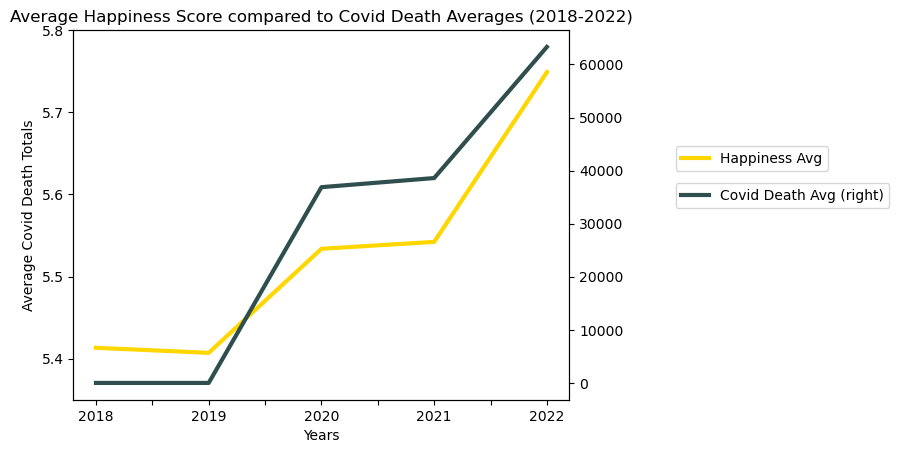

In [7]:
ax = hypo_df2.plot(kind = 'line', x = "Years",
                  y = "Happiness Avg", ylabel = "Happiness Score Average", color = 'Gold',
                  ylim = [5.35,5.8], linewidth = 3, legend="lower right")
 
ax2 = hypo_df2.plot(kind = 'line', x = "Years",
                   y = "Covid Death Avg", ylabel = "Average Covid Death Totals", secondary_y = True, color = 'darkslategray',  linewidth = 3,
                   ax = ax, legend="lower right")

ax.legend(bbox_to_anchor=(1.20,0.6),loc="lower left")
ax2.legend(bbox_to_anchor=(1.20,0.5),loc="lower left")

plt.title("Average Happiness Score compared to Covid Death Averages (2018-2022)")
plt.show()

### Indepentent T-Test For Hypothesis

In [8]:
#2018-2022
hap_scores18 = merged2018df["Happiness Score"]
hap_scores22 = merged2022df2["Happiness Score"]
st.ttest_ind(hap_scores18, hap_scores22, equal_var=False)

Ttest_indResult(statistic=-2.302773775704768, pvalue=0.02221680343150734)

We can reject the Null Hypothesis, because the happiness scores between 2018 and 2022 were not random.

### United States

In [9]:
#Set up for United States
us18 = merged2018df.loc[(merged2018df["Country"] == "United States")]
hapus18 = float(us18["Happiness Score"])

us19 = short19df.loc[(short19df["Country"] == "United States")]
hapus19 = float(us19["Happiness Score"])

us20 = merged2020df2.loc[(merged2020df2["Country"] == "United States")]
hapus20 = float(us20["Happiness Score"])
cdus20 = float(us20["End of the Year: Covid Deaths"])

us21 = merged2021df.loc[(merged2021df["Country"] == "United States")]
hapus21 = float(us21["Happiness Score"])
cdus21 = float(us21["End of the Year: Covid Deaths"])

us22 = merged2022df.loc[(merged2022df["Country"] == "United States")]
hapus22 = float(us22["Happiness Score"])
cdus22 = float(us22["End of the Year: Covid Deaths"])

#United States DataFrame
hypo_dfus= pd.DataFrame({"Years":["2018","2019","2020","2021","2022"],
                         "Happiness Score":[hapus18, hapus19, hapus20, hapus21, hapus22], 
                         "Total Covid Deaths":[0,0, cdus20, cdus21, cdus22]})
hypo_dfus

,Years,Happiness Score,Total Covid Deaths
0,2018,6.8860,0.0
1,2019,6.8920,0.0
2,2020,6.9396,825468.0
3,2021,6.9510,825468.0
4,2022,6.9770,1092764.0


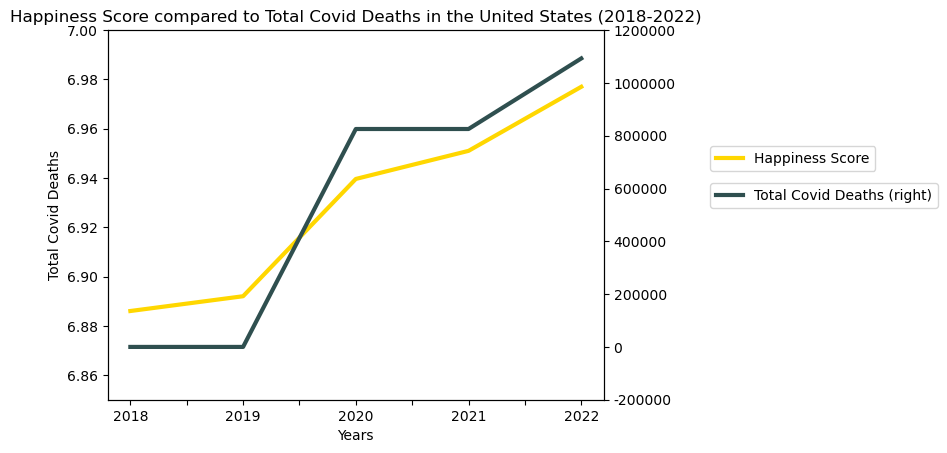

In [10]:
ax = hypo_dfus.plot(kind = 'line', x = "Years",
                  y = "Happiness Score", ylabel = "Happiness Score",
                    ylim = [6.85,7], color = 'Gold', linewidth = 3)
ax2 = hypo_dfus.plot(kind = 'line', x = "Years",
                   y = "Total Covid Deaths", secondary_y = True,
                   ylabel = "Total Covid Deaths", color = 'darkslategray',  linewidth = 3, ax = ax)

ax.legend(bbox_to_anchor=(1.20,0.6),loc="lower left")
ax2.legend(bbox_to_anchor=(1.20,0.5),loc="lower left")

current_values = ax2.get_yticks()
ax2.yaxis.set_ticks(current_values)
ax2.yaxis.set_ticklabels(["{:.0f}".format(x) for x in current_values])

plt.title("Happiness Score compared to Total Covid Deaths in the United States (2018-2022)")
plt.show()

### Does Life Expectancy play a role in Happiness?

In [11]:
#Set Up
lifeavg18 = merged2018df["Life Expectancy 18"].mean()
lifeavg20 = merged2020df2["Life Expectancy 20"].mean()
lifeavg22 = merged2022df2["Life Expectancy 22"].mean()
lifeavg19 = (lifeavg18 + lifeavg20)/2
lifeavg21 = (lifeavg22 + lifeavg20)/2

lifehapdf = pd.DataFrame({"Years":["2018","2019","2020","2021","2022"],
                         "Average Happiness Score":[hapavg18, hapavg19, hapavg20, hapavg21, hapavg22],
                         "Average Life Expectancy":[lifeavg18, lifeavg19, lifeavg20, lifeavg21, lifeavg22]})
lifehapdf

,Years,Average Happiness Score,Average Life Expectancy
0,2018,5.413237,72.602857
1,2019,5.407096,72.467963
2,2020,5.533778,72.333068
3,2021,5.542180,73.387633
4,2022,5.748861,74.442198


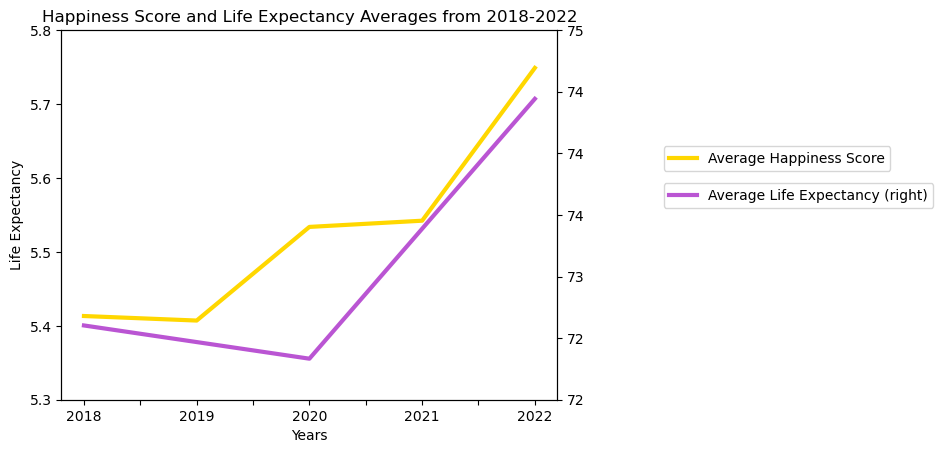

In [12]:
#Line graph of Happiness and Life Expectancies 
ax = lifehapdf.plot(kind = 'line', x = "Years",
                  y = "Average Happiness Score", ylabel = "Happiness Score",
                    ylim = [5.3,5.8], color = 'Gold', linewidth = 3)

ax2 = lifehapdf.plot(kind = 'line', x = "Years",
                   y = "Average Life Expectancy", secondary_y = True,
                   ylabel = "Life Expectancy", color = 'mediumorchid',  linewidth = 3, ax = ax)

ax.legend(bbox_to_anchor=(1.20,0.6),loc="lower left")
ax2.legend(bbox_to_anchor=(1.20,0.5),loc="lower left")

current_values = ax2.get_yticks()
ax2.yaxis.set_ticks(current_values)
ax2.yaxis.set_ticklabels(["{:.0f}".format(x) for x in current_values])

plt.title("Happiness Score and Life Expectancy Averages from 2018-2022")
plt.show()

The r-value is: 0.6424116207420912


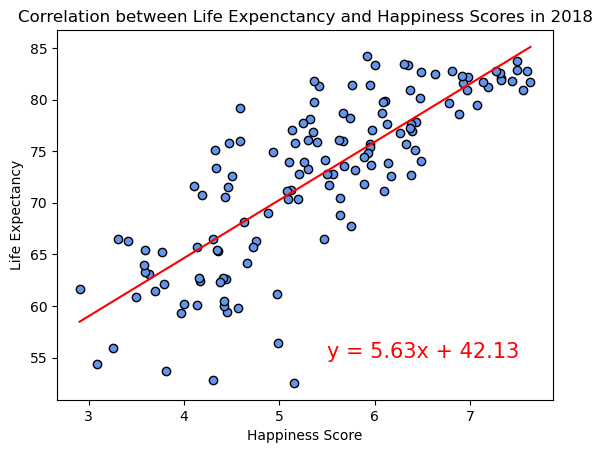

In [13]:
#2018 Scatter Plot
marker_size=10
x_values = merged2018df["Happiness Score"]
y_values = merged2018df["Life Expectancy 18"]
plt.scatter(x_values ,y_values, marker="o",edgecolor='black', linewidth=1, facecolor='cornflowerblue')
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Correlation between Life Expenctancy and Happiness Scores in 2018")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.6111120203929803


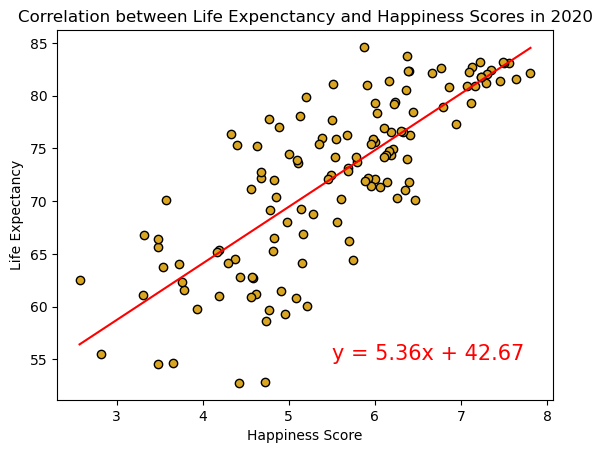

In [14]:
#2020 Scatter Plot
marker_size=10
x_values = merged2020df2["Happiness Score"]
y_values = merged2020df2["Life Expectancy 20"]
plt.scatter(x_values ,y_values, edgecolor='black', linewidth=1, facecolor='goldenrod')
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Correlation between Life Expenctancy and Happiness Scores in 2020")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5513636387215355


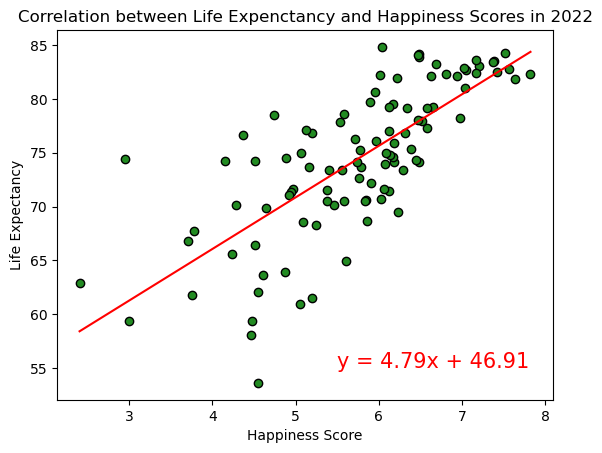

In [15]:
#2022 Scatter Plot
marker_size=10
x_values = merged2022df2["Happiness Score"]
y_values = merged2022df2["Life Expectancy 22"]
plt.scatter(x_values ,y_values, edgecolor='black', linewidth=1, facecolor='forestgreen')
plt.xlabel("Happiness Score")
plt.ylabel("Life Expectancy")
plt.title("Correlation between Life Expenctancy and Happiness Scores in 2022")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.5,55),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
plt.show()